In [1]:
# Include libraries
import difflib
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Loading and printing data
movie_data = pd.read_csv("./movies.csv")
movie_data

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en

In [3]:
# Feature selection
feature_data = ['genres', 'keywords', 'tagline', 'title', 'cast', 'director']
print(feature_data)

['genres', 'keywords', 'tagline', 'title', 'cast', 'director']


In [4]:
# Replacing Null Value
for feature in feature_data:
    movie_data[feature] = movie_data[feature].fillna('')

In [5]:
# Combining the data
combined_data = movie_data["genres"] + ' ' + movie_data["keywords"] + ' ' + movie_data["tagline"] + \
    ' ' + movie_data["title"] + ' ' + movie_data["cast"] + ' ' + movie_data["director"]
print(combined_data)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Shanghai Calling Da...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [6]:
# Converting the text to feature vector
vectorizer = TfidfVectorizer()
feature_vector = vectorizer.fit_transform(combined_data)
print(feature_vector)

  (0, 2720)	0.16779665077750835
  (0, 8651)	0.10950771233518673
  (0, 14400)	0.18869504935935053
  (0, 11288)	0.15600564366704217
  (0, 9709)	0.22061174669983702
  (0, 16170)	0.1471845509560594
  (0, 18477)	0.19277176743945276
  (0, 15542)	0.2000852661458036
  (0, 14718)	0.21153518149440184
  (0, 19148)	0.19502634639381392
  (0, 18845)	0.22968831190527222
  (0, 14749)	0.14568185359096344
  (0, 1183)	0.2771429775697421
  (0, 12700)	0.2552737122112953
  (0, 12356)	0.0757123618230531
  (0, 18835)	0.12179929157015998
  (0, 16904)	0.05365726945306951
  (0, 5519)	0.22061174669983702
  (0, 15785)	0.2044948505609709
  (0, 3587)	0.24248101205828376
  (0, 18385)	0.12067236175146148
  (0, 15901)	0.3255851082321633
  (0, 6519)	0.15884357175977004
  (0, 3408)	0.21574818782392274
  (0, 4103)	0.20781904654682548
  :	:
  (4801, 7731)	0.25682086501772416
  (4801, 12869)	0.1918304797254379
  (4801, 1880)	0.1383742924803071
  (4801, 12062)	0.1190062927991386
  (4801, 8323)	0.094776382167548
  (4801, 4234

In [7]:
# Find Similarity Score
similarity = cosine_similarity(feature_vector)
print(similarity)
print(similarity.shape)

[[1.         0.07294698 0.03533251 ... 0.         0.         0.        ]
 [0.07294698 1.         0.02792771 ... 0.04419983 0.         0.        ]
 [0.03533251 0.02792771 1.         ... 0.         0.04636139 0.        ]
 ...
 [0.         0.04419983 0.         ... 1.         0.         0.05551043]
 [0.         0.         0.04636139 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.05551043 0.         1.        ]]
(4803, 4803)


In [8]:
# Clustering based on genres
num_clusters = 10  # You can choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(feature_vector)
clusters = kmeans.labels_

In [9]:
# Add cluster information to the dataframe
movie_data['cluster'] = clusters

In [13]:
# Getting user input and recommending movie
user_movie = input("Enter your favourite movie name: ")
list_of_movie_name = movie_data['title'].tolist()
find_close_match = difflib.get_close_matches(user_movie, list_of_movie_name)
find_close_match = find_close_match[0]
index = movie_data[movie_data['title'] == find_close_match].index[0]
similarity_score = list(enumerate(similarity[index]))
similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)

print("Movies Recommended to you: ")
i = 1
for movie_score in similarity_score:
    index = movie_score[0]
    title_from_index = movie_data.loc[index, 'title']

    if i < 31:
        print(i, '.', title_from_index)
        i += 1


Movies Recommended to you: 
1 . Iron Man
2 . Iron Man 2
3 . Iron Man 3
4 . The Avengers
5 . Avengers: Age of Ultron
6 . Ant-Man
7 . Captain America: Civil War
8 . Captain America: The Winter Soldier
9 . X-Men
10 . Made
11 . X-Men: Apocalypse
12 . X2
13 . The Incredible Hulk
14 . X-Men: First Class
15 . Deadpool
16 . Kick-Ass 2
17 . X-Men: Days of Future Past
18 . Guardians of the Galaxy
19 . Thor: The Dark World
20 . Captain America: The First Avenger
21 . G-Force
22 . Man of Steel
23 . X-Men: The Last Stand
24 . The Amazing Spider-Man 2
25 . Duets
26 . Mortdecai
27 . The Last Airbender
28 . Zathura: A Space Adventure
29 . The Good Night
30 . The Best Man


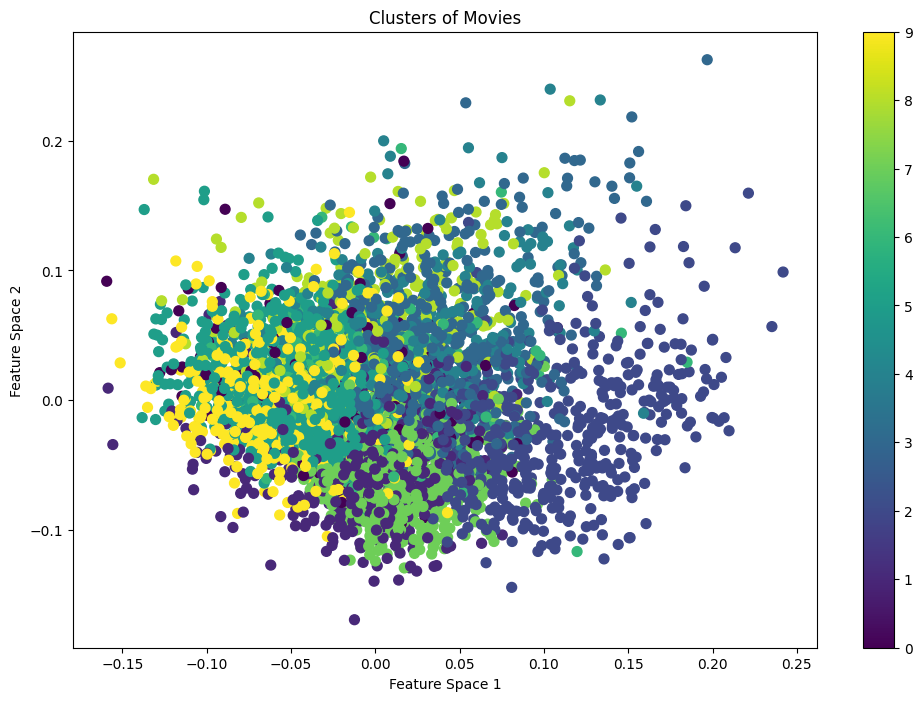

In [15]:
# Plotting the clusters after recommendations
pca = PCA(n_components=2)
pca_components = pca.fit_transform(feature_vector.toarray())

# Custom names for PCA components
x_component_name = "Feature Dimension 1"
y_component_name = "Feature Dimension 1"

plt.figure(figsize=(12, 8))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis', s=50)
plt.colorbar()
plt.title('Clusters of Movies')
plt.xlabel(x_component_name)
plt.ylabel(y_component_name)
plt.show()

In [16]:
# Adding cluster-based recommendations
user_movie_cluster = movie_data[movie_data['title'] == find_close_match]['cluster'].values[0]
cluster_movies = movie_data[movie_data['cluster'] == user_movie_cluster]['title'].tolist()
cluster_movies.remove(find_close_match)

print("\nAdditional Movies from the same cluster: ")
for i, title in enumerate(cluster_movies[:30], start=1):  # Limit to 30 additional movies
    print(i, '.', title)


Additional Movies from the same cluster: 
1 . Avatar
2 . John Carter
3 . Avengers: Age of Ultron
4 . Superman Returns
5 . Man of Steel
6 . The Avengers
7 . Men in Black 3
8 . Battleship
9 . Jurassic World
10 . Iron Man 3
11 . X-Men: The Last Stand
12 . Transformers: Revenge of the Fallen
13 . Transformers: Age of Extinction
14 . TRON: Legacy
15 . Green Lantern
16 . Terminator Salvation
17 . World War Z
18 . X-Men: Days of Future Past
19 . Star Trek Into Darkness
20 . Pacific Rim
21 . Transformers: Dark of the Moon
22 . Star Trek Beyond
23 . 2012
24 . Jupiter Ascending
25 . X-Men: Apocalypse
26 . Monsters vs Aliens
27 . Wild Wild West
28 . Suicide Squad
29 . Edge of Tomorrow
30 . G.I. Joe: The Rise of Cobra
